<a href="https://colab.research.google.com/github/AjMing/Pattern-EGCI463/blob/main/week6/Face_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

 # Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
lfw_dataset.images.shape


(1140, 62, 47)

In [4]:
# Compute a PCA
n_components = 700
pca = PCA(.97, whiten=True).fit(X_train)

# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [5]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(798, 227)
(342, 227)


In [6]:
# train a neural network
print("Fitting the classifier to the training set")
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1,verbose=1)

Fitting the classifier to the training set


In [9]:
model.fit(X_train_pca, y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(random_state=1, verbose=1)

In [10]:
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.84      0.78      0.81        68
  Donald Rumsfeld       0.68      0.71      0.69        38
    George W Bush       0.87      0.88      0.87       161
Gerhard Schroeder       0.79      0.74      0.76        35
       Tony Blair       0.71      0.75      0.73        40

         accuracy                           0.81       342
        macro avg       0.78      0.77      0.77       342
     weighted avg       0.81      0.81      0.81       342



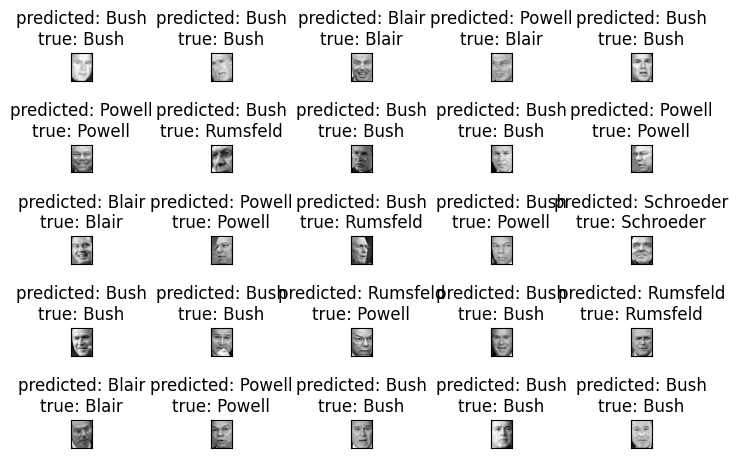

In [17]:
# Visualization
def plot_gallery(images, titles, h, w, rows=5, cols=5):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout(pad=1.5, h_pad=1.5, w_pad=10) # Add tight_layout for better spacing

def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield f'predicted: {pred_name}\ntrue: {true_name}'

prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)